In [10]:
# dependencies
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import urllib
import random
plotly.tools.set_credentials_file(username='michaelgarza', api_key='Dqqcuh2voaSqHOqQFP5W')

In [11]:
state_abbrev = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming',
        'District of Columbia':'District of Columbia'
}

reverse_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'District of Columbia':'District of Columbia'

}

In [12]:
# reading in csv file that contains county information to create the choropleth
# ('https://aqs.epa.gov/aqsweb/airdata/annual_aqi_by_county_2018.zip')

df_aqi = pd.read_csv("raw_data/annual_aqi_by_county_2017.csv")
df_aqi['County'] = df_aqi['County'].apply(lambda x: x.lower())
# df_aqi[df_aqi['State']==''.startswith('D')]
# df_aqi['State'].unique()
print(len(df_aqi))
df_aqi.head()

1061


,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,baldwin,2017,270,241,28,1,0,0,0,108,51,36,0,0,206,0,64,0
1,Alabama,clay,2017,118,104,14,0,0,0,0,66,52,30,0,0,0,0,118,0
2,Alabama,colbert,2017,283,265,18,0,0,0,0,63,48,37,0,0,218,0,65,0
3,Alabama,dekalb,2017,359,329,30,0,0,0,0,80,50,39,0,0,315,0,44,0
4,Alabama,elmore,2017,226,221,5,0,0,0,0,58,45,35,0,0,226,0,0,0


In [13]:
df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/laucnty16.csv')
# df_sample=pd.concat([df_sample, df_aqi],axis=1)
df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

# df_sample['County'], df_sample['State'] = df_sample[df_sample['County Name/State Abbreviation'][:-4]]
#  = df_sample[['County Name/State Abbreviation']][-2:]
df_sample["County"] = df_sample['County Name/State Abbreviation'].apply(lambda x: x.split(",")[0].replace(" County", "").lower())
df_sample["State Abbreviation"] = df_sample['County Name/State Abbreviation'].apply(lambda x: x.split(", ")[-1])
df_sample["State"] = df_sample["State Abbreviation"].apply(lambda x: state_abbrev[x])
# df_sample[df_sample["State Abbreviation"]=="District of Columbia"]
print(len(df_sample))
df_sample.head()

3219


,LAUS Code,State FIPS Code,County FIPS Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment Rate (%),FIPS,County,State Abbreviation,State
0,CN0100100000000,01,001,"Autauga County, AL",2016,"25,649","24,297","1,352",5.3,01001,autauga,AL,Alabama
1,CN0100300000000,01,003,"Baldwin County, AL",2016,"89,931","85,061","4,870",5.4,01003,baldwin,AL,Alabama
2,CN0100500000000,01,005,"Barbour County, AL",2016,"8,302","7,584",718,8.6,01005,barbour,AL,Alabama
3,CN0100700000000,01,007,"Bibb County, AL",2016,"8,573","8,004",569,6.6,01007,bibb,AL,Alabama
4,CN0100900000000,01,009,"Blount County, AL",2016,"24,525","23,171","1,354",5.5,01009,blount,AL,Alabama


In [14]:
df_countydata = df_sample[['State', 'County', 'FIPS', 'Year', 'State FIPS Code', 'State Abbreviation']]
df_countydata.head()

,State,County,FIPS,Year,State FIPS Code,State Abbreviation
0,Alabama,autauga,01001,2016,01,AL
1,Alabama,baldwin,01003,2016,01,AL
2,Alabama,barbour,01005,2016,01,AL
3,Alabama,bibb,01007,2016,01,AL
4,Alabama,blount,01009,2016,01,AL


In [15]:
df_countydata = df_countydata.merge(df_aqi, how='inner', on=['State', 'County'])
# help(pd.merge)
print(len(df_countydata))
df_countydata.head()

1002


,State,County,FIPS,Year_x,State FIPS Code,State Abbreviation,Year_y,Days with AQI,Good Days,Moderate Days,...,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,baldwin,01003,2016,01,AL,2017,270,241,28,...,0,108,51,36,0,0,206,0,64,0
1,Alabama,clay,01027,2016,01,AL,2017,118,104,14,...,0,66,52,30,0,0,0,0,118,0
2,Alabama,colbert,01033,2016,01,AL,2017,283,265,18,...,0,63,48,37,0,0,218,0,65,0
3,Alabama,dekalb,01049,2016,01,AL,2017,359,329,30,...,0,80,50,39,0,0,315,0,44,0
4,Alabama,elmore,01051,2016,01,AL,2017,226,221,5,...,0,58,45,35,0,0,226,0,0,0


In [16]:
state_aqi = pd.DataFrame(df_countydata.groupby(['FIPS','State FIPS Code','State','State Abbreviation'])['Median AQI'].mean()).reset_index()
state_aqi.head() #['Median AQI']
# help(pd.DataFrame.groupby)
# fips = df_countydata['FIPS'].tolist()
# values = df_countydata['Median AQI'].tolist()

,FIPS,State FIPS Code,State,State Abbreviation,Median AQI
0,01003,01,Alabama,AL,36
1,01027,01,Alabama,AL,30
2,01033,01,Alabama,AL,37
3,01049,01,Alabama,AL,39
4,01051,01,Alabama,AL,35


In [35]:
# df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
# df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
# df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

colorscale = ["#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce"]
colors = {"good": "#1fca23", 
          "moderate": "#fffd38", 
          "usg":"#fc6621", 
          "unhealthy": "#fc0d1b", 
          "very unhealthy":"#97084c", 
          "hazardous":"#7d0425", 
          "idk":"#000000"
         }
# endpts = list(np.linspace(0, 500, len(colors.values()) - 1))
endpts = [50, 100, 150, 200, 300, 500]
# endpts = list(np.linspace(0, 500, 50))
fips = df_countydata['FIPS'].tolist()
values = df_countydata['Max AQI'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colors.values(),
    show_state_data=True,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Max AQI 2017',
    legend_title='% Air Quality Index'
)

py.iplot(fig, filename='choropleth_full_usa')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~michaelgarza/0 or inside your plot.ly account where it is named 'choropleth_full_usa'


In [34]:
colorscale = ["#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce"]
colors = {"good": "#1fca23", 
          "moderate": "#fffd38", 
          "usg":"#fc6621", 
          "unhealthy": "#fc0d1b", 
          "very unhealthy":"#97084c", 
          "hazardous":"#7d0425", 
          "idk":"#000000"
         }
endpts = [50, 100, 150, 200, 300, 500]
fips = state_aqi['FIPS'].tolist()
values = state_aqi['Median AQI'].tolist()

fig = ff.create_choropleth(fips=fips,
    values=values, scope=['usa'],
    binning_endpoints=endpts,
    colorscale=colors.values(),
    show_state_data=True,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Median AQI',
    legend_title='% Air Quality Index'
)

py.iplot(fig, filename='choropleth_full_usa')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~michaelgarza/0 or inside your plot.ly account where it is named 'choropleth_full_usa'


In [19]:
# help(ff.create_choropleth)

In [20]:
# the following block of code is to create the choropleth
# for col in df.columns:
#     df[col] = df[col].astype(str)
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)


scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

colors = {"good": "#1fca23", 
          "moderate": "#fffd38", 
          "usg":"#fc6621", 
          "unhealthy": "#fc0d1b", 
          "very unhealthy":"#97084c", 
          "hazardous":"#7d0425", 
          "idk":"#000000"
         }
endpts = [[50, 100, 150, 200, 300, 500]]

df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = True,
        locations = df_countydata['State Abbreviation'],
        z = df_countydata['Median AQI'].astype(float),
        locationmode = 'USA-states',
        text = df_countydata['Median AQI'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Median AQI")
        ) ]

layout = dict(
        title = '2017 Median AQI by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

## Cancer Data by State

In [21]:
# Read in csvs as dataframes
df_cancer_1998_2008 = pd.read_csv("raw_data/state_yearly_monthly_cancer_statistics_1999_to_2008.csv")
df_cancer_2009_2014 = pd.read_csv("raw_data/state_yearly_monthly_cancer_statistics_2009_to_2014.csv")

# Remove lines without data
df_cancer_1998_2008 = df_cancer_1998_2008.loc[df_cancer_1998_2008["State"].isin(reverse_state_abbrev)]
df_cancer_2009_2014 = df_cancer_2009_2014.loc[df_cancer_2009_2014["State"].isin(reverse_state_abbrev)]

# Combine dataframes
df_cancer_1998_2014 = df_cancer_1998_2008.append(df_cancer_2009_2014, ignore_index=True)

# Add column with state abbreviation for making choropleth
df_cancer_1998_2014["State Abbreviation"] = df_cancer_1998_2014["State"].apply(lambda x: reverse_state_abbrev[x])

# Change numeric dtypes
df_cancer_1998_2014[['State Code', 'Year', 'Year Code', 'Count']\
                   ] = df_cancer_1998_2014[['State Code', 'Year', 'Year Code', 'Count']].astype(int)

df_cancer_1998_2014.head()

,Notes,Cancer Sites,Cancer Sites Code,Region,Region Code,State,State Code,Year,Year Code,Count,State Abbreviation
0,NaN,All Invasive Cancer Sites Combined,0,Northeast,CENS-R1,Connecticut,9,1999,1999,18694,CT
1,NaN,All Invasive Cancer Sites Combined,0,Northeast,CENS-R1,Connecticut,9,2000,2000,19200,CT
2,NaN,All Invasive Cancer Sites Combined,0,Northeast,CENS-R1,Connecticut,9,2001,2001,19626,CT
3,NaN,All Invasive Cancer Sites Combined,0,Northeast,CENS-R1,Connecticut,9,2002,2002,19570,CT
4,NaN,All Invasive Cancer Sites Combined,0,Northeast,CENS-R1,Connecticut,9,2003,2003,19516,CT


In [24]:
# Group data by state
cancer_by_state = df_cancer_1998_2014.groupby(['State Abbreviation','State'])[['Count']].sum()
cancer_by_state = cancer_by_state.reset_index('State Abbreviation')
cancer_by_state.head()

,State Abbreviation,Count
State,,
Alaska,AK,125735
Alabama,AL,1215322
Arkansas,AR,668683
Arizona,AZ,1356728
California,CA,7956919


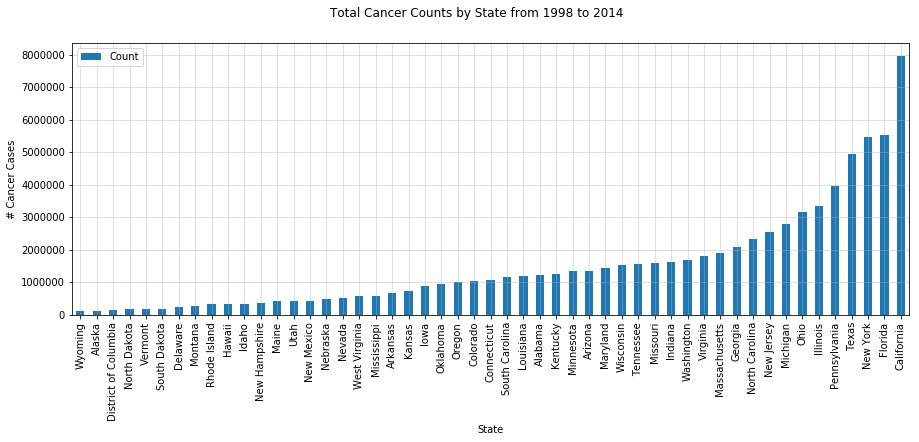

In [29]:
# Plot total number of cancer cases by state
cancer_by_state.sort_values('Count').plot(kind='bar', figsize=[15,5])
plt.suptitle("Total Cancer Counts by State from 1998 to 2014")
plt.ylabel('# Cancer Cases')
plt.grid(alpha=0.5)

In [25]:
# Most common cancers overall

# Get rid of summary data
df_cancer_types = df_cancer_1998_2014.loc[df_cancer_1998_2014["Cancer Sites"] != "All Invasive Cancer Sites Combined"]

# Group by cancer sites
cancer_types = df_cancer_types.groupby(['Cancer Sites'])[['Count']].sum()

# Sort by counts
cancer_types_sorted = cancer_types.sort_values('Count', ascending=False)

most_common_cancers = cancer_types_sorted[:50]
most_common_cancers.head()

,Count
Cancer Sites,
Digestive System,4275858
Respiratory System,3573481
Male Genital System,3468525
Male and Female Breast,3404582
Female Breast,3375872


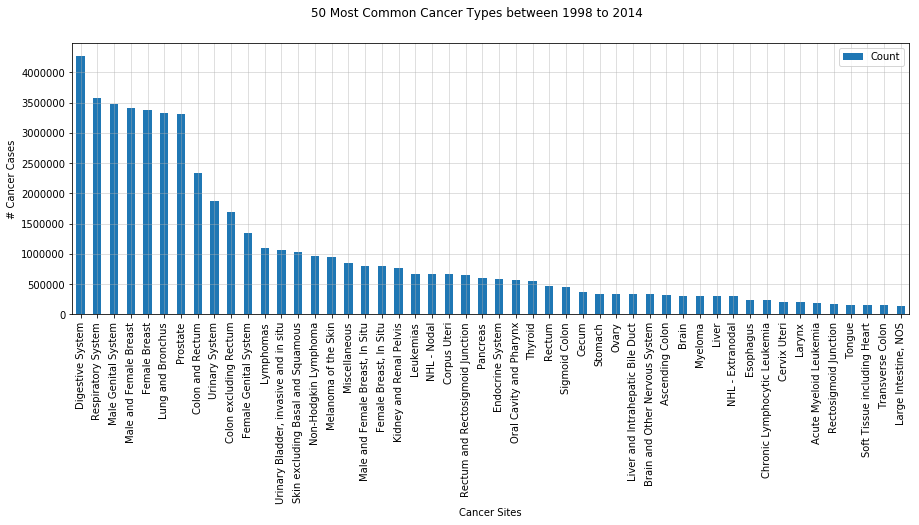

In [26]:
# Plot cancer types
num = len(most_common_cancers)
most_common_cancers.plot(kind='bar', figsize=[15,5])
plt.suptitle("{} Most Common Cancer Types between 1998 to 2014".format(num))
plt.ylabel('# Cancer Cases')
plt.grid(alpha=0.5)

In [27]:
# Most common cancers in each state

# Group data by state and by cancer site
df_cancer_types = df_cancer_1998_2014.loc[df_cancer_1998_2014["Cancer Sites"] != "All Invasive Cancer Sites Combined"]

# cancer_types = df_cancer_types.groupby(['State', 'Cancer Sites'])[['Count']].sum()
cancer_types = df_cancer_types.groupby(['State', 'State Abbreviation', 'Cancer Sites'])[['Count']].sum()

# All ranked by descending count
cancer_types = cancer_types.sort_values('Count', ascending=False).reset_index()

# Top 5 most common cancers in each state
cancer_types_sorted = cancer_types.groupby(['State']).apply(lambda x: x.sort_values('Count', ascending=False).head().reset_index())
# cancer_types_sorted = cancer_types.apply(lambda x: x.sort_values('Count', ascending=False).head())
# most_common_cancers = cancer_types_sorted[:5]
# cancer_types
# most_common_cancers
cancer_types_sorted#['State Abbreviation']
# cancer_types
# help(pd.DataFrame.sort_values)

index          State State Abbreviation  \
State                                                      
Alabama       0    174        Alabama                 AL   
              1    187        Alabama                 AL   
              2    205        Alabama                 AL   
              3    228        Alabama                 AL   
              4    237        Alabama                 AL   
Alaska        0   1261         Alaska                 AK   
              1   1426         Alaska                 AK   
              2   1434         Alaska                 AK   
              3   1470         Alaska                 AK   
              4   1514         Alaska                 AK   
Arizona       0    147        Arizona                 AZ   
              1    204        Arizona                 AZ   
              2    206        Arizona                 AZ   
              3    207        Arizona                 AZ   
              4    222        Arizona                 AZ   
Arkansas      0    343       Arkansas                 AR   
              1    365       Arkansas                 AR   
              2    373       Arkansas                 AR   
              3    424       Arkansas                 AR   
              4    439       Arkansas                 AR   
California    0      0     California                 CA   
              1      1     California                 CA   
              2      2     California                 CA   
              3      3     California                 CA   
              4      4     California                 CA   
Colorado      0    242       Colorado                 CO   
              1    252       Colorado                 CO   
              2    257       Colorado                 CO   
              3    260       Colorado                 CO   
              4    269       Colorado                 CO   
...                ...            ...                ...   
Vermont       0   1136        Vermont                 VT   
              1   1182        Vermont                 VT   
              2   1200        Vermont                 VT   
              3   1205        Vermont                 VT   
              4   1218        Vermont                 VT   
Virginia      0     96       Virginia                 VA   
              1    108       Virginia                 VA   
              2    110       Virginia                 VA   
              3    113       Virginia                 VA   
              4    115       Virginia                 VA   
Washington    0    112     Washington                 WA   
              1    139     Washington                 WA   
              2    141     Washington                 WA   
              3    142     Washington                 WA   
              4    150     Washington                 WA   
West Virginia 0    382  West Virginia                 WV   
              1    406  West Virginia                 WV   
              2    409  West Virginia                 WV   
              3    554  West Virginia                 WV   
              4    573  West Virginia                 WV   
Wisconsin     0    125      Wisconsin                 WI   
              1    159      Wisconsin                 WI   
              2    180      Wisconsin                 WI   
              3    181      Wisconsin                 WI   
              4    185      Wisconsin                 WI   
Wyoming       0   1327        Wyoming                 WY   
              1   1362        Wyoming                 WY   
              2   1364        Wyoming                 WY   
              3   1519        Wyoming                 WY   
              4   1527        Wyoming                 WY   

                           Cancer Sites   Count  
State                                            
Alabama       0        Digestive System   68012  
              1      Respiratory System   65904  
              2       Lung and Bronc

In [28]:
# the following block of code is to create the choropleth
init_notebook_mode(connected=True)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

endpts = [[50, 100, 150, 200, 300, 500]]


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = True,
        locations = cancer_by_state['State Abbreviation'].tolist(),
        z = cancer_by_state['Count'],
        locationmode = 'USA-states',
        text = cancer_by_state,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Cancer Counts")
        ) ]

layout = dict(
        title = 'Cancer by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

TypeError: Object of type 'DataFrame' is not JSON serializable

In [ ]:
# Most common cancers by year